In [1]:
#Deal with warning and plots
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the libraries and datasets 
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#importing pipeline 
from sklearn.pipeline import Pipeline
#gridsearch
from sklearn.model_selection import (GridSearchCV, StratifiedKFold)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [3]:
#importing the dataset
iris = datasets.load_iris()


In [4]:
#Fitting a Linear SVC
model = LinearSVC(max_iter=10000)
model.fit(iris.data, iris.target)
predicted = model.predict(iris.data)
model.score(iris.data, iris.target)

0.9666666666666667

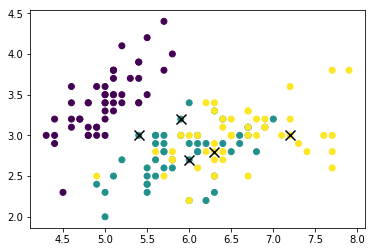

In [5]:
#plot
errors  = iris.target != predicted
plt.scatter(iris.data[:,0], 
            iris.data[:,1], 
            c=iris.target)
plt.scatter(iris.data[errors,0],
            iris.data[errors,1], 
            marker='x',c='black',
            s=100)

In [6]:
#Fitting a linear logistic model
model2 =Pipeline([
    ('scaler',StandardScaler()),
    ('est',LogisticRegression(penalty='l1')),])

# model fitting 
model2.fit(iris.data, iris.target)
preicted = model2.predict(iris.data)
model2.score(iris.data, iris.target)

0.94

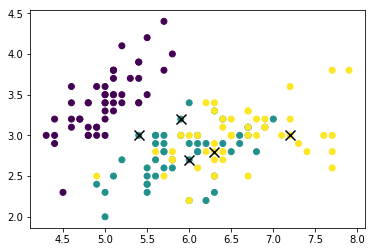

In [7]:
errors  = iris.target != predicted

plt.scatter(iris.data[:,0], 
            iris.data[:,1], 
            c=iris.target)
##plotting errors
plt.scatter(iris.data[errors,0],
            iris.data[errors,1], 
            marker='x',c='black',
            s=100)

In [8]:
#pipeline : chains of instrustions on the estimators
#Implementing a Gridsearch
#Fitting a linear logistic model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',LogisticRegression()),])

params = {
    'clf__C': [0.001, 0.01, 1, 10],
    'clf__penalty': ['l1','l2'],
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
}

model2 = GridSearchCV(pipe,params, cv=StratifiedKFold(5), n_jobs=4)

# model fitting 
model2.fit(iris.data, iris.target)
predicted = model2.predict(iris.data)
model2.score(iris.data, iris.target)


0.98

# Linear Model
y = x*w1 +w0
E_d = mean((y-t)^2)

# Regularization
E = E_d + αE_w\
E_w = |w1| + |w0|  ## L1, Lasso --minimising the absolute value , sparse\
E_w = w1**2 + w02  ## L2, Ridge --sqaure value , creates a balanced model

### Feature Selection 
Feature engineering means selecting features that are important for the task 
Minimizing Geralization error
- Select by hand ---putting everything in the data to test 
- Checking for unhelpfull features after exploring 
- Getting rid of unhelpful features 


### Coef_ : are coefficients or weights

In [9]:
from sklearn.linear_model import Lasso
#model that does feature selction 
model3 = Lasso(alpha=0.1)
#predicting the last column given the first three
model3.fit(iris.data[:,:-1],iris.data[:,-1])
#
print(model3.coef_)

[0.         0.         0.38345049]


# Select before fitting the model 
- VarianceThreshold
  - small variance has little signall therefore these features should be considered as a candidate for dropping.
  - Its insensitive to range 
  - This should be done before scaling/normalizing the data
- Select from the model 
  - We use some of the sklearns models to help us select the features


In [10]:
from sklearn.feature_selection import SelectFromModel
model4 = SelectFromModel(Lasso(alpha=0.01))
model4.fit(iris.data, iris.target)

transformed_data = model4.transform(iris.data)

print('before: ', iris.data.shape)
print('After: ', transformed_data.shape)

before:  (150, 4)
After:  (150, 3)


In [11]:
import pandas as pd
import numpy as np


#### Excersize

The goal of the task is to experiment with feature selection methods 

Experiment with classification methods and try to minimize test error on this dataset:

1. Reduce the dataset dimensionality
2. Train of the the classification methods on the training set
3. Compute the classification accuracy on the set 
4. Visualise the confusion matrix

In [12]:
dataset1 = datasets.load_boston()

In [13]:
features = dataset1.data
labels = dataset1.target

In [14]:
#divide the data into training and test sets
from sklearn.model_selection import train_test_split

random_state = 0 #fixed so that we get the same test/train split 
test_set_fraction = .3
x_train, x_test, t_train, t_test = train_test_split(features, labels,
                                                    test_size=test_set_fraction,
                                                    random_state=random_state)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
pipe2 = Pipeline([
     #selection search
     ('scaler', SelectFromModel(Lasso())),
     ('lrg', LinearRegression()),
 ])
params = {
    #{
    'scaler__estimator': [Lasso(),],
    'scaler__estimator__alpha': [10,1,0.1,0.001,.0001],
    'lrg__normalize': [True, False],
   # },
     #{
    #'scaler__estimator': [LinearSVR(),],
    #'scaler__estimator__alpha': [10,1,0.1,0.001,.0001],
    #'lrg__normalize': [True, False],
   # },
    
}
model5 = GridSearchCV(pipe2, params, cv=5)

In [16]:
model5.fit(x_train, t_train)
model5.score(x_train, t_train)

/root/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7645451026942549

## Other ways of feature engineering is to use PCA
PCA is a tool used to decorrelate  features 
its reduces the percived dimentionality 